# 10.4 Predicting house prices

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Load một số dữ liệu bán nhà

Tập dữ liệu bán nhà quận King, khu vực đóng ở Seatle, tiểu bang Washington, Hoa Kỳ. Tập dữ liệu được đặt tên **"home_data.csv"**

In [2]:
sales = pd.read_csv('data/home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Thăm dò dữ liệu bán nhà

 Giá nhà tương quan với diện tích không gian sống. In ra một biểu đồ phân tán (scatter plot) để thể hiện điều này. 

**Gợi ý**: sử dụng "sqft_living" và "price" 

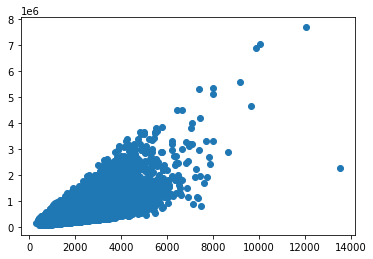

In [3]:
plt.scatter(sales.sqft_living, sales.price)

## Tạo một mô hình hồi quy đơn giản về `sqft_living` với `price`

### Chia dữ liệu thành training và testing.  
Chúng ta sử dụng seed=0 để mọi người chạy notebook này có kết quả như nhau. Ở lab này, cần thiết lập **train_size=0.8, test_size=0.2, and random_state=0**

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales, test_size=0.2, random_state=0)

### Tạo một mô hình hồi quy tuyến tính chỉ dùng `sqft_living` làm feature

In [5]:
from sklearn.linear_model import LinearRegression

sqft_model = LinearRegression()
sqft_model.fit(train_data[['sqft_living']], train_data.price)

LinearRegression()

### Đánh giá mô hình đơn giản

In [6]:
print(test_data['price'].mean())

529242.6106870229


Đưa ra dự đoán và tính sai số toàn phương trung bình (MSE).

In [7]:
predictions = sqft_model.predict(test_data[['sqft_living']])
labels = test_data['price']
print(np.sqrt(sklearn.metrics.mean_squared_error(labels, predictions)))

248879.06143647013


### Hãy xem dự đoán của chúng ta thế nào

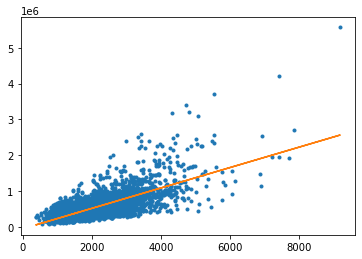

In [8]:
plt.plot(test_data['sqft_living'], 
        test_data['price'], '.',
        test_data['sqft_living'],
        predictions, '-')

In [9]:
sqft_model.coef_

array([283.96855737])

## Khám phá các feature khác trong dữ liệu

Hãy khám phá thêm các feature khác để tạo một mô hình phức tạp hơn.

In [10]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
sales[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


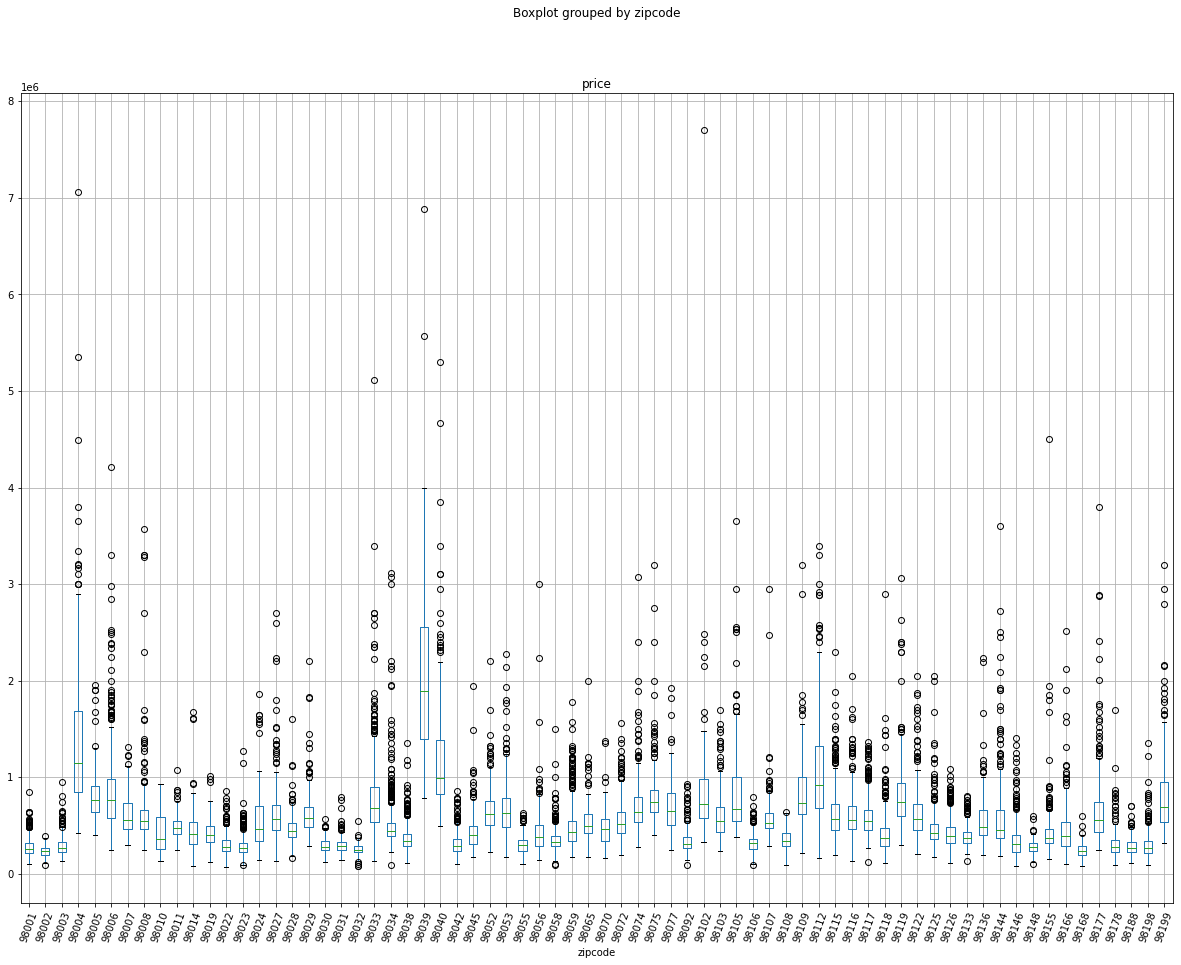

In [11]:
ax = sales.boxplot(column='price', by='zipcode', rot=70 ,figsize=(20, 15)) # rot=45 nghĩa là xoay 70 độ

98039 là zip code đắt giá nhất.

## Tạo một mô hình hồi quy tuyến tính với nhiều feature hơn

In [12]:
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features], train_data.price)
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## So sánh kết quả của mô hình đơn giản với mô hình thêm nhiều feature

In [13]:
labels = test_data['price']
prediction = sqft_model.predict(test_data[['sqft_living']])
# print mean squared error
print(np.sqrt(sklearn.metrics.mean_squared_error(labels, prediction)))

predictions = my_features_model.predict(test_data[my_features])
print(np.sqrt(sklearn.metrics.mean_squared_error(labels, predictions)))

248879.06143647013
244004.77443104287


MSE giảm từ \$248.879\$ xuống \$244,004\$ khi có nhiều 

## Áp dụng mô hình đã học để đoán giá 3 căn nhà

Căn nhà đầu tiên là nhà "tầm trung" ở Seatle.

In [14]:
house1 = sales.loc[sales['id']==5309101200]
house1[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
1054,4,2.25,2400,5350,1.5,98117


In [15]:
print(house1.price)

1054    620000
Name: price, dtype: int64


In [16]:
print(sqft_model.predict(house1[['sqft_living']]))

[633267.47422744]


In [17]:
print(my_features_model.predict(house1[my_features]))

[637556.26515923]


Trong trường hợp này, mô hình với nhiều feature hơn cho dự đoán tệ hơn mô hình đơn giản chỉ có 1 feature. Tuy nhiên, nhìn chung mô hình có nhiều feature hơn lại tốt hơn.

Dự đoán căn nhà thứ 2: căn nhà đẹp hơn

Chúng ta sẽ xem xét các dự đoán cho một căn nhà đẹp mắt hơn.

In [18]:
house2 = sales.loc[sales['id']==1925069082]
house2[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
1361,5,4.25,4640,22703,2.0,98052


In [19]:
print(sqft_model.predict(house2[['sqft_living']]))

[1269357.04273158]


In [20]:
print(my_features_model.predict(house2[my_features]))

[1274443.76531348]


Căn nhà thứ 3: căn nhà vô cùng đẹp

Căn nhà cuối cùng rất rộng, được sở hữu bởi một người dân bản xứ.

In [21]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [22]:
bill_gates = pd.DataFrame.from_dict(bill_gates)
print(my_features_model.predict(bill_gates[my_features]))

[15796988.23574132]
